## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.957122 -0.695984  0.932054 -1.180003  0.886689 -0.190359
1 -1.583553  0.520963  0.914400 -1.005484  1.304196 -1.198508
2  1.502124 -0.583483 -0.471692  0.905466  0.978464  1.307556
3 -0.378746 -0.977783  1.142129  1.003811  0.784500  0.307043
4  1.057035 -1.305263 -0.812450 -1.450483  0.277511 -1.302455


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9987264	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.9902588	total: 68.2ms	remaining: 34s
2:	learn: 0.9808670	total: 68.7ms	remaining: 22.8s
3:	learn: 0.9712496	total: 69.2ms	remaining: 17.2s
4:	learn: 0.9620189	total: 69.8ms	remaining: 13.9s
5:	learn: 0.9517566	total: 70.4ms	remaining: 11.7s
6:	learn: 0.9411224	total: 71ms	remaining: 10.1s
7:	learn: 0.9325445	total: 71.5ms	remaining: 8.86s
8:	learn: 0.9249753	total: 71.9ms	remaining: 7.92s
9:	learn: 0.9154693	total: 72.4ms	remaining: 7.17s
10:	learn: 0.9062957	total: 73ms	remaining: 6.56s
11:	learn: 0.8973504	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8880149	total: 74.1ms	remaining: 5.62s
13:	learn: 0.8803685	total: 74.7ms	remaining: 5.26s
14:	learn: 0.8731077	total: 75.2ms	remaining: 4.94s
15:	learn: 0.8642941	total: 75.7ms	remaining: 4.65s
16:	learn: 0.8567080	total: 76.1ms	remaining: 4.4s
17:	learn: 0.8497916	total: 76.6ms	remaining: 4.18s
18:	learn: 0.8418155	total: 77ms	remaining: 3.97s
1

90:	learn: 0.4646279	total: 109ms	remaining: 1.08s
91:	learn: 0.4612048	total: 109ms	remaining: 1.08s
92:	learn: 0.4582036	total: 110ms	remaining: 1.07s
93:	learn: 0.4538183	total: 110ms	remaining: 1.06s
94:	learn: 0.4499418	total: 111ms	remaining: 1.05s
95:	learn: 0.4462874	total: 111ms	remaining: 1.05s
96:	learn: 0.4431879	total: 112ms	remaining: 1.04s
97:	learn: 0.4398489	total: 112ms	remaining: 1.03s
98:	learn: 0.4361651	total: 113ms	remaining: 1.02s
99:	learn: 0.4326253	total: 113ms	remaining: 1.02s
100:	learn: 0.4295636	total: 114ms	remaining: 1.01s
101:	learn: 0.4261797	total: 114ms	remaining: 1s
102:	learn: 0.4229974	total: 115ms	remaining: 998ms
103:	learn: 0.4202341	total: 115ms	remaining: 991ms
104:	learn: 0.4167698	total: 115ms	remaining: 984ms
105:	learn: 0.4139791	total: 116ms	remaining: 977ms
106:	learn: 0.4104286	total: 116ms	remaining: 970ms
107:	learn: 0.4074191	total: 117ms	remaining: 963ms
108:	learn: 0.4047512	total: 117ms	remaining: 957ms
109:	learn: 0.4017232	tot

256:	learn: 0.1587957	total: 187ms	remaining: 541ms
257:	learn: 0.1574895	total: 187ms	remaining: 539ms
258:	learn: 0.1567888	total: 188ms	remaining: 538ms
259:	learn: 0.1558741	total: 188ms	remaining: 536ms
260:	learn: 0.1548403	total: 189ms	remaining: 535ms
261:	learn: 0.1538421	total: 189ms	remaining: 533ms
262:	learn: 0.1527442	total: 190ms	remaining: 532ms
263:	learn: 0.1517332	total: 190ms	remaining: 530ms
264:	learn: 0.1508322	total: 191ms	remaining: 529ms
265:	learn: 0.1500701	total: 191ms	remaining: 527ms
266:	learn: 0.1491436	total: 191ms	remaining: 526ms
267:	learn: 0.1483122	total: 192ms	remaining: 524ms
268:	learn: 0.1472096	total: 193ms	remaining: 523ms
269:	learn: 0.1464085	total: 193ms	remaining: 522ms
270:	learn: 0.1455485	total: 193ms	remaining: 520ms
271:	learn: 0.1448516	total: 194ms	remaining: 519ms
272:	learn: 0.1440978	total: 194ms	remaining: 518ms
273:	learn: 0.1433666	total: 195ms	remaining: 517ms
274:	learn: 0.1425788	total: 196ms	remaining: 516ms
275:	learn: 

481:	learn: 0.0492927	total: 292ms	remaining: 314ms
482:	learn: 0.0490752	total: 293ms	remaining: 313ms
483:	learn: 0.0488620	total: 293ms	remaining: 313ms
484:	learn: 0.0486106	total: 294ms	remaining: 312ms
485:	learn: 0.0484025	total: 295ms	remaining: 311ms
486:	learn: 0.0481523	total: 295ms	remaining: 311ms
487:	learn: 0.0479489	total: 295ms	remaining: 310ms
488:	learn: 0.0476944	total: 296ms	remaining: 309ms
489:	learn: 0.0474680	total: 296ms	remaining: 308ms
490:	learn: 0.0472724	total: 297ms	remaining: 308ms
491:	learn: 0.0470317	total: 297ms	remaining: 307ms
492:	learn: 0.0468397	total: 298ms	remaining: 306ms
493:	learn: 0.0466225	total: 298ms	remaining: 306ms
494:	learn: 0.0463869	total: 299ms	remaining: 305ms
495:	learn: 0.0461956	total: 299ms	remaining: 304ms
496:	learn: 0.0459649	total: 300ms	remaining: 303ms
497:	learn: 0.0457793	total: 300ms	remaining: 303ms
498:	learn: 0.0455569	total: 301ms	remaining: 302ms
499:	learn: 0.0453387	total: 301ms	remaining: 301ms
500:	learn: 

650:	learn: 0.0235864	total: 371ms	remaining: 199ms
651:	learn: 0.0234721	total: 371ms	remaining: 198ms
652:	learn: 0.0233811	total: 372ms	remaining: 198ms
653:	learn: 0.0232920	total: 372ms	remaining: 197ms
654:	learn: 0.0232156	total: 373ms	remaining: 196ms
655:	learn: 0.0231129	total: 373ms	remaining: 196ms
656:	learn: 0.0230314	total: 374ms	remaining: 195ms
657:	learn: 0.0229563	total: 374ms	remaining: 195ms
658:	learn: 0.0228943	total: 375ms	remaining: 194ms
659:	learn: 0.0228339	total: 376ms	remaining: 193ms
660:	learn: 0.0227243	total: 376ms	remaining: 193ms
661:	learn: 0.0226383	total: 376ms	remaining: 192ms
662:	learn: 0.0225310	total: 377ms	remaining: 192ms
663:	learn: 0.0224678	total: 377ms	remaining: 191ms
664:	learn: 0.0223855	total: 378ms	remaining: 190ms
665:	learn: 0.0222535	total: 378ms	remaining: 190ms
666:	learn: 0.0221822	total: 379ms	remaining: 189ms
667:	learn: 0.0220391	total: 379ms	remaining: 189ms
668:	learn: 0.0219592	total: 380ms	remaining: 188ms
669:	learn: 

869:	learn: 0.0114679	total: 476ms	remaining: 71.1ms
870:	learn: 0.0114054	total: 476ms	remaining: 70.5ms
871:	learn: 0.0113445	total: 477ms	remaining: 70ms
872:	learn: 0.0113270	total: 477ms	remaining: 69.4ms
873:	learn: 0.0112678	total: 478ms	remaining: 68.9ms
874:	learn: 0.0112115	total: 478ms	remaining: 68.3ms
875:	learn: 0.0111974	total: 479ms	remaining: 67.8ms
876:	learn: 0.0111836	total: 479ms	remaining: 67.2ms
877:	learn: 0.0111500	total: 479ms	remaining: 66.6ms
878:	learn: 0.0110989	total: 480ms	remaining: 66.1ms
879:	learn: 0.0110659	total: 480ms	remaining: 65.5ms
880:	learn: 0.0110314	total: 481ms	remaining: 64.9ms
881:	learn: 0.0109818	total: 481ms	remaining: 64.4ms
882:	learn: 0.0109494	total: 482ms	remaining: 63.8ms
883:	learn: 0.0109158	total: 482ms	remaining: 63.2ms
884:	learn: 0.0109008	total: 482ms	remaining: 62.7ms
885:	learn: 0.0108631	total: 483ms	remaining: 62.1ms
886:	learn: 0.0108487	total: 483ms	remaining: 61.6ms
887:	learn: 0.0107895	total: 484ms	remaining: 61

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

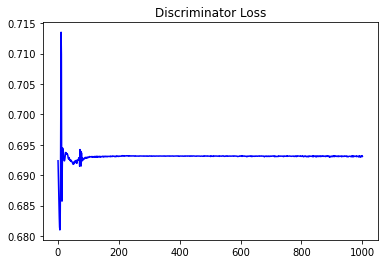

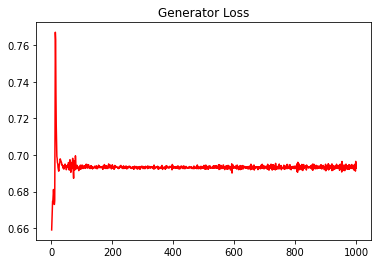

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23498823931890128


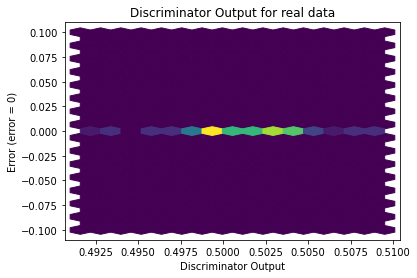

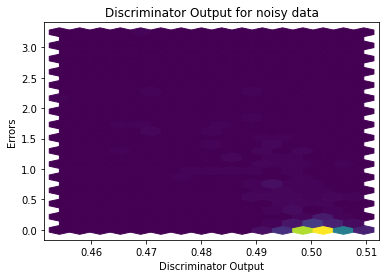

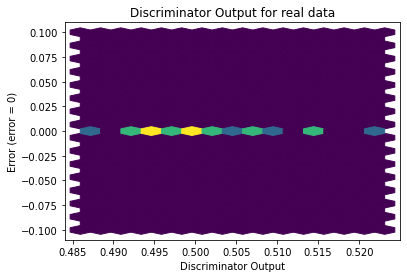

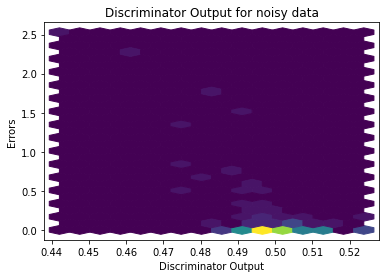

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


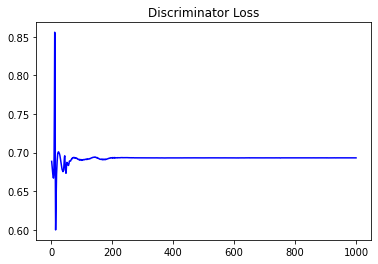

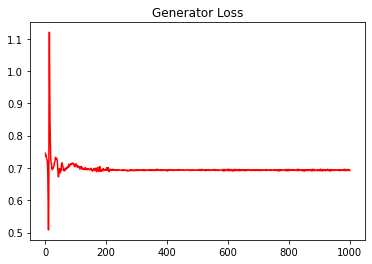

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21791232919501488


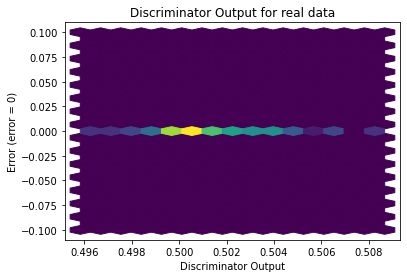

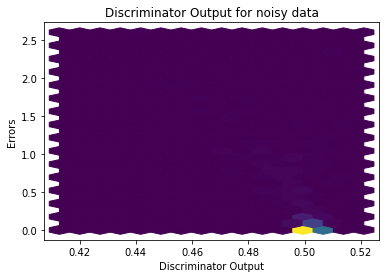

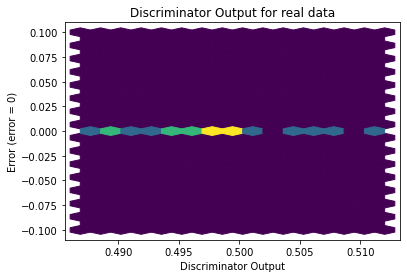

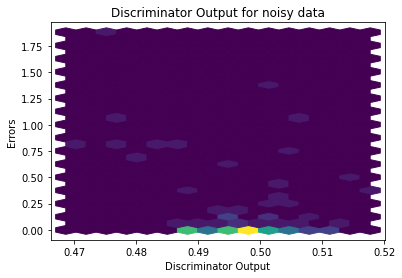

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3407]], requires_grad=True)
